<a href="https://colab.research.google.com/github/Mahmoud0090/deep-learning-models/blob/main/Object_Detection_with_Tensorflowhub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading modules

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
import cv2
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading model directly from the website

In [2]:
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")

Loading image and transforming it to rgb tensor format

In [16]:
width = 1000
height = 800

In [23]:
img_url = "/content/drive/MyDrive/MyShares/animal10/train/elephant/OIP--m1aerbTHlu_7bsA7MBOrAHaFj.jpeg"
img = cv2.imread(img_url)
img = cv2.resize(img, (width, height))
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

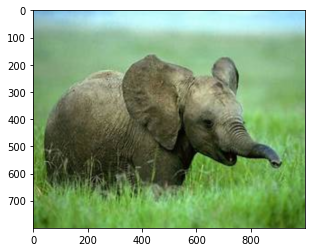

In [24]:
plt.imshow(rgb)

In [25]:
rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)
rgb_tensor = tf.expand_dims(rgb_tensor, 0)
rgb_tensor

<tf.Tensor: shape=(1, 800, 1000, 3), dtype=uint8, numpy=
array([[[[130, 184, 222],
         [130, 184, 222],
         [129, 183, 221],
         ...,
         [179, 239, 255],
         [179, 239, 255],
         [179, 239, 255]],

        [[130, 184, 222],
         [130, 184, 222],
         [129, 183, 221],
         ...,
         [179, 239, 255],
         [179, 239, 255],
         [179, 239, 255]],

        [[130, 184, 222],
         [130, 184, 222],
         [129, 183, 221],
         ...,
         [177, 238, 255],
         [178, 238, 255],
         [178, 238, 255]],

        ...,

        [[ 82, 127,  32],
         [ 82, 127,  32],
         [ 79, 124,  30],
         ...,
         [ 87, 133,  57],
         [ 88, 134,  58],
         [ 88, 134,  58]],

        [[ 83, 128,  33],
         [ 83, 128,  33],
         [ 80, 125,  30],
         ...,
         [ 88, 134,  60],
         [ 90, 136,  61],
         [ 90, 136,  61]],

        [[ 83, 128,  33],
         [ 83, 128,  33],
         [ 80, 12

loading labels

In [26]:
label_path = "/content/drive/MyDrive/MyShares/labels.csv"
label = pd.read_csv(label_path, sep=';', index_col='ID')
labels = label['OBJECT (2017 REL.)']
print(labels)

ID
1         person
2        bicycle
3            car
4     motorcycle
5       airplane
         ...    
87      scissors
88    teddy bear
89    hair drier
90    toothbrush
91             -
Name: OBJECT (2017 REL.), Length: 91, dtype: object


detecting objects

In [27]:
boxes, scores, classes, num_detection = detector(rgb_tensor)


<tf.Tensor: shape=(1,), dtype=int32, numpy=array([100], dtype=int32)>

In [40]:
pred_labels = classes.numpy().astype('int')[0]
pred_labels = [labels[i] for i in pred_labels]

pred_boxes = boxes.numpy()[0].astype('int')
pred_scores = scores.numpy()[0]

displaying on image

In [41]:
for score, (ymin, xmin, ymax, xmax), label in zip(pred_scores, pred_boxes, pred_labels):
    if score < 0.5:
        continue

    img_boxes = cv2.rectangle(rgb, (xmin, ymin), (xmax,ymax), (0,255,0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_boxes, label, (xmin, ymax-10), font, 1.5, (255, 0, 0), 2, cv2.LINE_AA )
    score_txt = f"{100 * round(score)}%"
    cv2.putText(img_boxes, score_txt, (xmin, ymax+10), font, 1.5, (0, 0, 255), 2, cv2.LINE_AA )

showing image

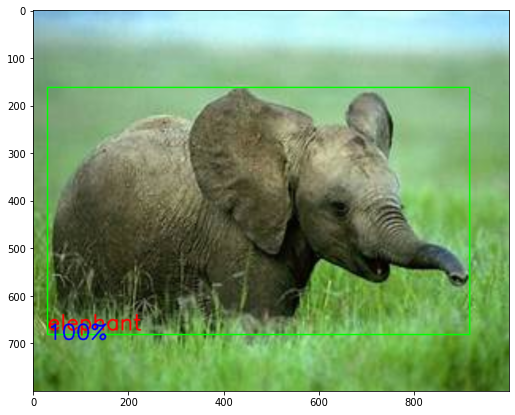

In [42]:
plt.figure(figsize=(15,7))
plt.imshow(img_boxes)